**Lab Work 1**

---



Step 1 - Import Library

In [3]:
import numpy as np
import pandas as pd

Step 2 - Load Data

In [5]:
data = pd.read_csv('dataset.csv')

Step 3 - Data Understanding

In [6]:
# inspect first data
data.head()

# check data size
data.shape

# check general information
data.info()

# check data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Step 4 - Visualize The Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


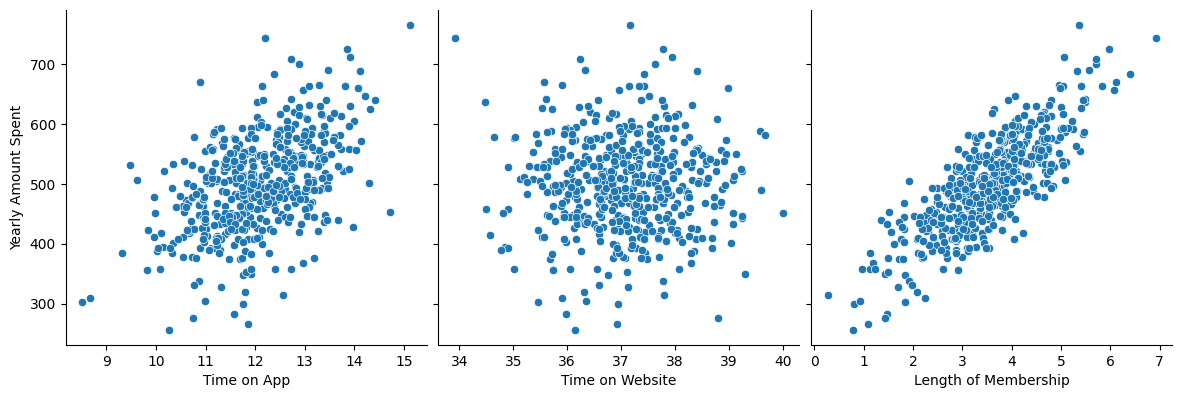

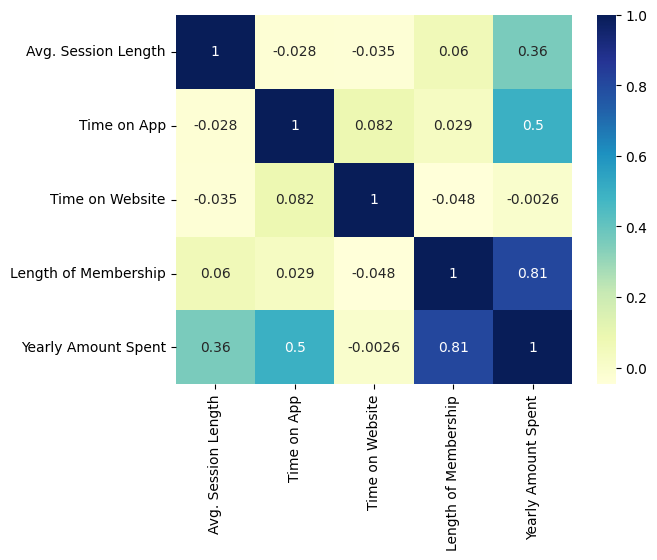

In [34]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
# Exclude non-numerical columns from the correlation calculation
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()


Step 5 - Build Regression Model

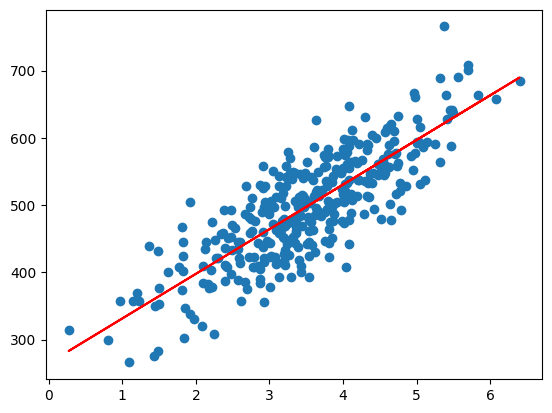

In [12]:
#Inspect the independend and dependend variables

# X is independen variabel, Y is dependen variable
X = data['Length of Membership']
y = data['Yearly Amount Spent']

#Split training and testing data using 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#Build Regression Model
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualize Model
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Step 6 - Residual Analysis

<ipython-input-16-0c93ba5dbe5a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


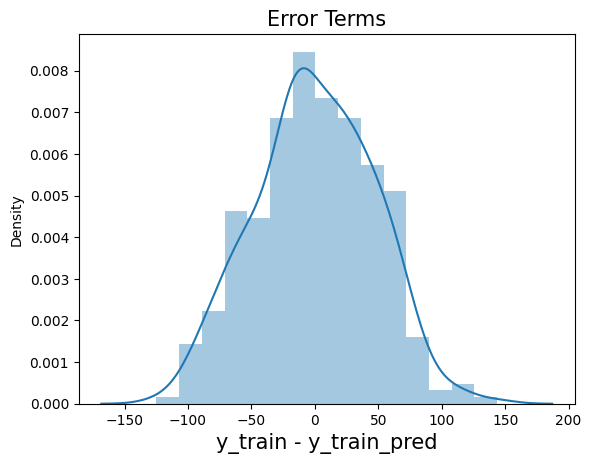

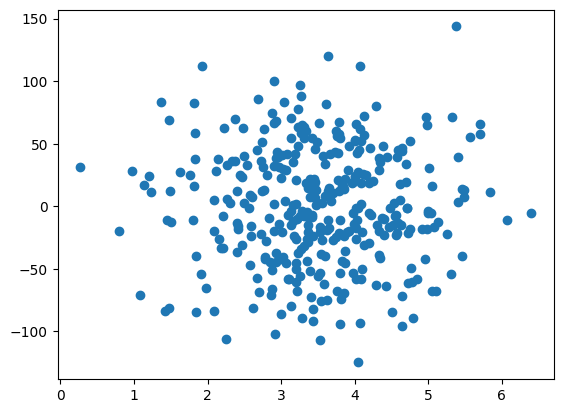

In [16]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Step 7 - Make a Prediction Using Testing Data

In [17]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

#Evaluate using R^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Step 8 - Visualize The Result

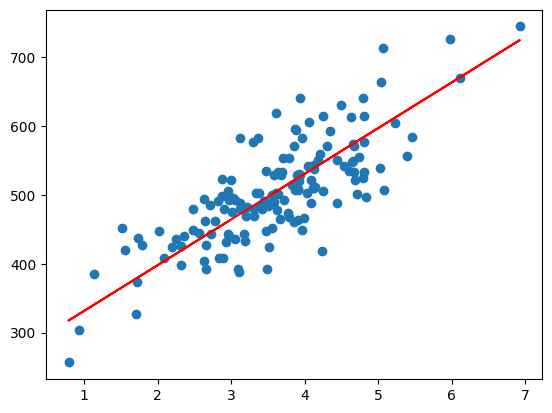

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

**Lab Work 2**

---



Step 1 - Import Library

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2 - Load Data

In [45]:
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja


Step 3 - Preprocessing --> Feature Scaling

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))


Step 4 - Fit SVR Model

In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Step 5 - Visualize

<ipython-input-48-e63ebe097fbe>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


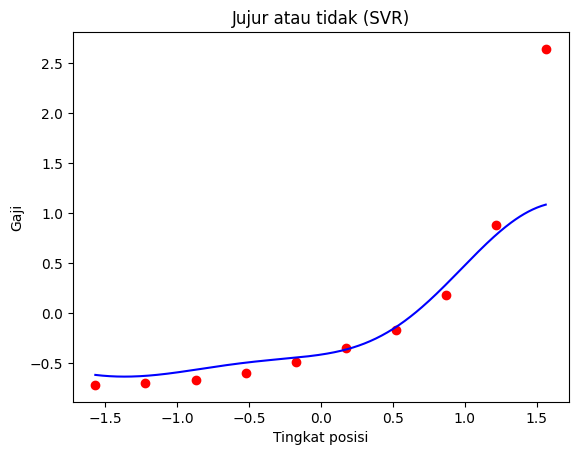

In [48]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Step 6 - Make a Prediction

In [49]:
# Create 2D Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Step 7 - Print Result

In [50]:
# Show result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])


Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


Step 8 - Validation

<ipython-input-52-e1dd6a1ffffb>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


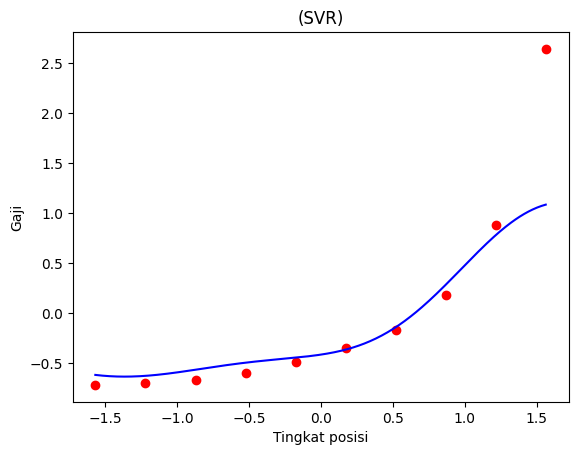

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [52]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# Create 2D Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

# Show result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

This graph visualizes how the SVR model attempts to fit the existing data and provides predictions based on the given job position level (6.5 in this case). In practice, you can use this model to make salary predictions for other job position levels by substituting the value of tingkat_posisi_prediksi (predicted job position level).

Step 9 - Model Evaluation

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MSE
mse = mean_squared_error(y_actual, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


**Lab Asssigment **

---



**1. Import Libraries and Load Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('insurance.csv')
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**2. Dataset Overview**

In [3]:
# Check dataset columns and data types
print(data.columns)
print(data.info())

# Statistical description of the dataset
print(data.describe())


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000  

**3. Visualizing Distribution and Transformation**

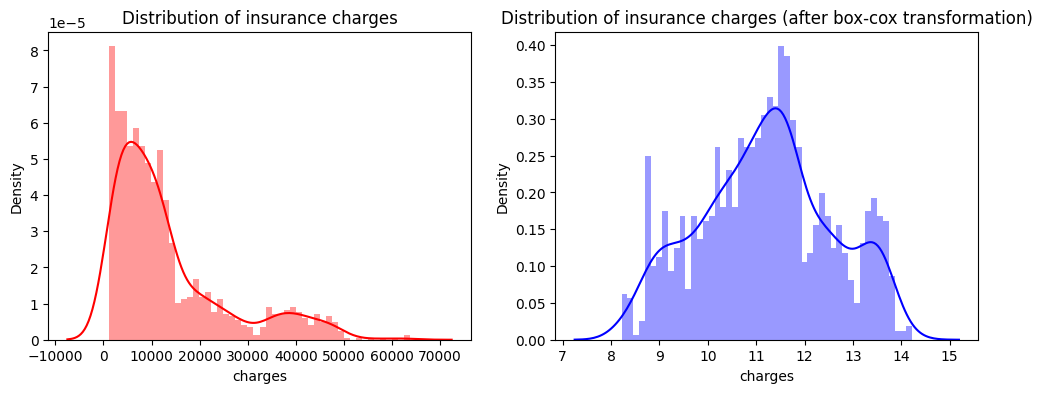

In [4]:
# Visualize 'charges' distribution
fig= plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
sns.distplot(data['charges'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of insurance charges')

# Apply Box-Cox transformation
data['charges'], _ = stats.boxcox(data['charges'])

# Visualize the distribution after Box-Cox transformation
ax = fig.add_subplot(122)
sns.distplot(data['charges'], bins=50, color='b', ax=ax)
ax.set_title('Distribution of insurance charges (after box-cox transformation)')
plt.show()


**4. Preprocessing: Encode Categorical Variables**

In [5]:
# Encode categorical features
le = LabelEncoder()
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

print(data.head())


   age  sex     bmi  children  smoker  region    charges
0   19    0  27.900         0       1       3  12.128980
1   18    1  33.770         1       0       2   8.808597
2   28    1  33.000         3       0       2  10.147521
3   33    1  22.705         0       0       1  12.534951
4   32    1  28.880         0       0       1   9.945637


**5. Feature Selection and Train-Test Split**
We will use all available features for training and testing:

In [6]:
# Define independent variables (X) and dependent variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(936, 6) (402, 6) (936,) (402,)


**6. Feature Scaling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**7. Linear Regression Model**

In [8]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Display actual vs predicted values
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(df_lr.head())


         Actual  Predicted
578   11.295175  11.228531
610   11.103130  11.087128
569   13.685434  13.843226
1034  11.725536  11.842917
198   11.282801  10.970067


**8. SVR Model**

In [9]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Display actual vs predicted values for SVR
df_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})
print(df_svr.head())


         Actual  Predicted
578   11.295175  11.388443
610   11.103130  11.200166
569   13.685434  13.866950
1034  11.725536  11.770543
198   11.282801  11.383101


**9. Model Evaluation**

In [10]:
# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R-squared: {r2_lr}")

# Evaluate SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr}, MSE: {mse_svr}, R-squared: {r2_svr}")


Linear Regression - MAE: 0.41247430583404837, MSE: 0.43538517301248325, R-squared: 0.7769656583226969
SVR - MAE: 0.22806598992961724, MSE: 0.30227793481826026, R-squared: 0.8451523745531123


**10. Visualize the Results**

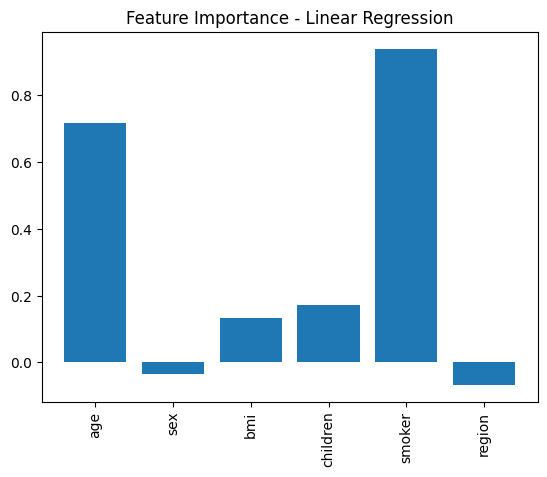

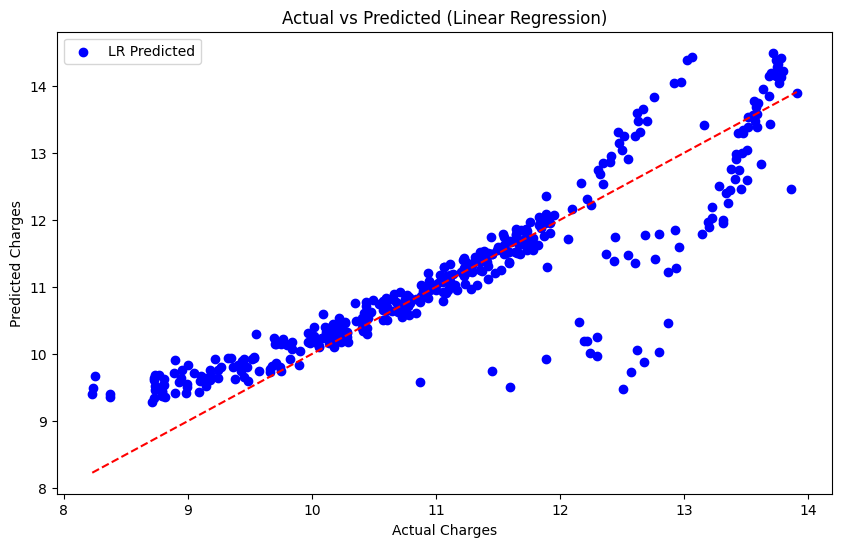

In [11]:
# Feature importance for Linear Regression
importance = lr_model.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=[x for x in range(len(importance))], labels=X.columns, rotation=90)
plt.title('Feature Importance - Linear Regression')
plt.show()

# Actual vs Predicted (Linear Regression)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='LR Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()
